In [133]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bmw-worldwide-sales-records-20102024/BMW sales data (2010-2024) (1).csv


In [134]:
df=pd.read_csv('/kaggle/input/bmw-worldwide-sales-records-20102024/BMW sales data (2010-2024) (1).csv')
df.head()

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low


In [135]:
df

,Model,Year,Region,Color,Fuel_Type,Transmission,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume,Sales_Classification
0,5 Series,2016,Asia,Red,Petrol,Manual,3.5,151748,98740,8300,High
1,i8,2013,North America,Red,Hybrid,Automatic,1.6,121671,79219,3428,Low
2,5 Series,2022,North America,Blue,Petrol,Automatic,4.5,10991,113265,6994,Low
3,X3,2024,Middle East,Blue,Petrol,Automatic,1.7,27255,60971,4047,Low
4,7 Series,2020,South America,Black,Diesel,Manual,2.1,122131,49898,3080,Low
...,...,...,...,...,...,...,...,...,...,...,...
49995,i3,2014,Asia,Red,Hybrid,Manual,4.6,151030,42932,8182,High
49996,i3,2023,Middle East,Silver,Electric,Manual,4.2,147396,48714,9816,High
49997,5 Series,2010,Middle East,Red,Petrol,Automatic,4.5,174939,46126,8280,High
49998,i3,2020,Asia,White,Electric,Automatic,3.8,3379,58566,9486,High


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Model                 50000 non-null  object 
 1   Year                  50000 non-null  int64  
 2   Region                50000 non-null  object 
 3   Color                 50000 non-null  object 
 4   Fuel_Type             50000 non-null  object 
 5   Transmission          50000 non-null  object 
 6   Engine_Size_L         50000 non-null  float64
 7   Mileage_KM            50000 non-null  int64  
 8   Price_USD             50000 non-null  int64  
 9   Sales_Volume          50000 non-null  int64  
 10  Sales_Classification  50000 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 4.2+ MB


In [137]:
df.describe()

,Year,Engine_Size_L,Mileage_KM,Price_USD,Sales_Volume
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2017.015700,3.247180,100307.203140,75034.600900,5067.514680
std,4.324459,1.009078,57941.509344,25998.248882,2856.767125
min,2010.000000,1.500000,3.000000,30000.000000,100.000000
25%,2013.000000,2.400000,50178.000000,52434.750000,2588.000000
50%,2017.000000,3.200000,100388.500000,75011.500000,5087.000000
75%,2021.000000,4.100000,150630.250000,97628.250000,7537.250000
max,2024.000000,5.000000,199996.000000,119998.000000,9999.000000


In [138]:
df['Year'].value_counts()

Year
2022    3478
2024    3427
2019    3392
2021    3372
2016    3365
2015    3358
2014    3350
2012    3332
2010    3330
2013    3326
2017    3290
2011    3278
2018    3278
2023    3219
2020    3205
Name: count, dtype: int64

In [139]:
df['Year'].max()

2024

In [140]:
df['Year'].min()

2010

In [141]:
df['Region'].max()

'South America'

In [142]:
total_sale=df.groupby('Region')['Sales_Volume'].sum()
top_country = total_sale.idxmax()
top_country
# total_sale.max()

'Asia'

In [143]:
df['Region'].value_counts()

Region
Asia             8454
Middle East      8373
North America    8335
Europe           8334
Africa           8253
South America    8251
Name: count, dtype: int64

In [144]:
df['Growth_Rate'] = df['Sales_Volume'].pct_change()

# Calculate average annual growth rate
aagr = df['Growth_Rate'][1:].mean() * 100
aagr

136.29063362497257

In [145]:
df_grouped = df.groupby(['Year', 'Model'])['Sales_Volume'].sum().reset_index()
df_grouped

,Year,Model,Sales_Volume
0,2010,3 Series,1647769
1,2010,5 Series,1501229
2,2010,7 Series,1388037
3,2010,M3,1523792
4,2010,M5,1594989
...,...,...,...
160,2024,X3,1664449
161,2024,X5,1458678
162,2024,X6,1836396
163,2024,i3,1621427


In [146]:
best_sellers = df_grouped.loc[df_grouped.groupby('Year')['Sales_Volume'].idxmax()]
best_sellers

,Year,Model,Sales_Volume
0,2010,3 Series,1647769
16,2011,X1,1694495
31,2012,i3,1752148
38,2013,X1,1730904
44,2014,3 Series,1682545
57,2015,7 Series,1683339
66,2016,3 Series,1712098
79,2017,7 Series,1763339
98,2018,i8,1623682
104,2019,X1,1681721


In [147]:
df_sorted = df.sort_values(by=["Model", "Year"])

# Step 2: Calculate year-to-year change in Sales
df_sorted["Change"] = df_sorted.groupby("Model")["Sales_Volume"].diff()

# Step 3: Analyze trend
def check_trend(changes):
    if (changes > 0).all():
        return "Upward"
    elif (changes < 0).all():
        return "Downward"
    else:
        return "Fluctuating"

# Step 4: Apply trend detection for each model
trend_summary = df_sorted.groupby("Model")["Change"].apply(check_trend)

print(trend_summary)

Model
3 Series    Fluctuating
5 Series    Fluctuating
7 Series    Fluctuating
M3          Fluctuating
M5          Fluctuating
X1          Fluctuating
X3          Fluctuating
X5          Fluctuating
X6          Fluctuating
i3          Fluctuating
i8          Fluctuating
Name: Change, dtype: object


/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)
/usr/local/lib/python3.11/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in less
  return op(a, b)


In [148]:
sales_by_model = df.groupby("Model")["Sales_Volume"].sum()
print(sales_by_model)

Model
3 Series    23281303
5 Series    23097519
7 Series    23786466
M3          22349694
M5          22779688
X1          23406060
X3          22745529
X5          22709749
X6          22661986
i3          23133849
i8          23423891
Name: Sales_Volume, dtype: int64


In [149]:
sales_by_year = df.groupby("Year")["Sales_Volume"].sum()
print(sales_by_year)

Year
2010    16933445
2011    16758941
2012    16751895
2013    16866733
2014    16958960
2015    17010207
2016    16957550
2017    16620811
2018    16412273
2019    17191956
2020    16310843
2021    16884666
2022    17920946
2023    16268654
2024    17527854
Name: Sales_Volume, dtype: int64


In [150]:
total_sales = df["Sales_Volume"].sum()
total_sales

253375734

# What are the most common models sold?

In [151]:
most_common_models = df["Model"].value_counts()

print(most_common_models)

Model
7 Series    4666
i3          4618
i8          4606
3 Series    4595
5 Series    4592
X1          4570
X3          4497
X5          4487
M5          4478
X6          4478
M3          4413
Name: count, dtype: int64


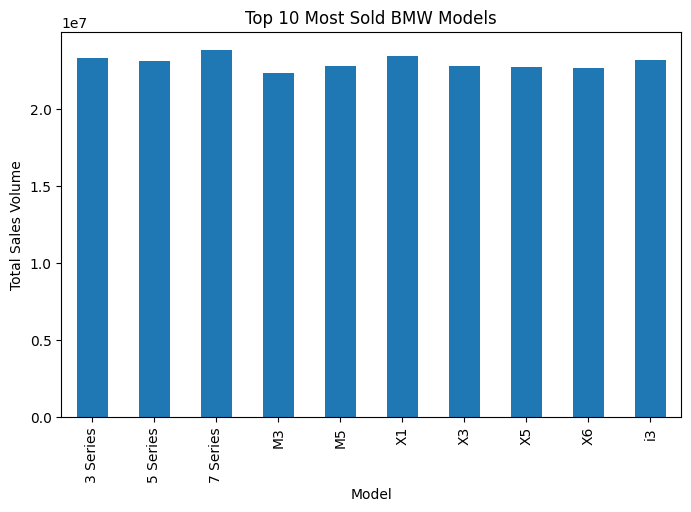

In [152]:
sales_by_model.head(10).plot(kind='bar', figsize=(8,5))
plt.title("Top 10 Most Sold BMW Models")
plt.xlabel("Model")
plt.ylabel("Total Sales Volume")
plt.show()

In [153]:
avg_price_per_model = df.groupby("Model")["Price_USD"].mean().sort_values(ascending=False)

print(avg_price_per_model)

Model
7 Series    75570.196742
3 Series    75566.233950
i8          75366.270951
5 Series    75287.844077
X1          75262.219037
X3          75016.616856
M3          74841.588715
i3          74800.268081
X5          74708.116782
M5          74474.930996
X6          74434.600491
Name: Price_USD, dtype: float64


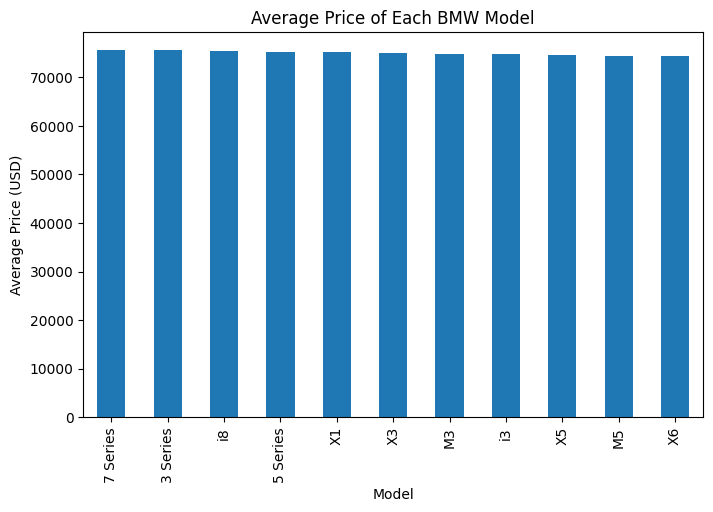

In [154]:
avg_price_per_model.plot(kind='bar', figsize=(8,5))
plt.title("Average Price of Each BMW Model")
plt.xlabel("Model")
plt.ylabel("Average Price (USD)")
plt.show()

<Axes: ylabel='count'>

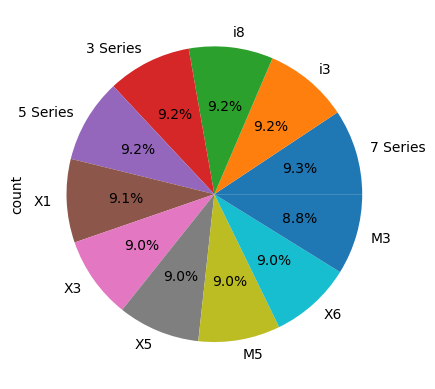

In [155]:
df['Model'].value_counts().plot(kind='pie',autopct='%0.1f%%')

<Axes: title={'center': 'Color Distribution'}, ylabel='count'>

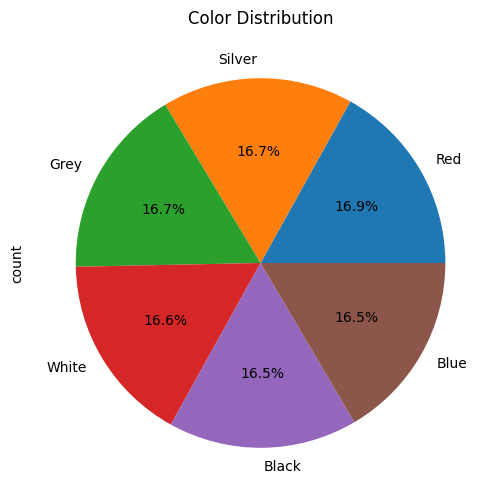

In [156]:
df['Color'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(6,6), title='Color Distribution')

In [157]:
sales_by_model = df.groupby(['Year', 'Model']).size().reset_index(name='Total_Sold')
most_sold_each_year = sales_by_model.loc[sales_by_model.groupby('Year')['Total_Sold'].idxmax()]


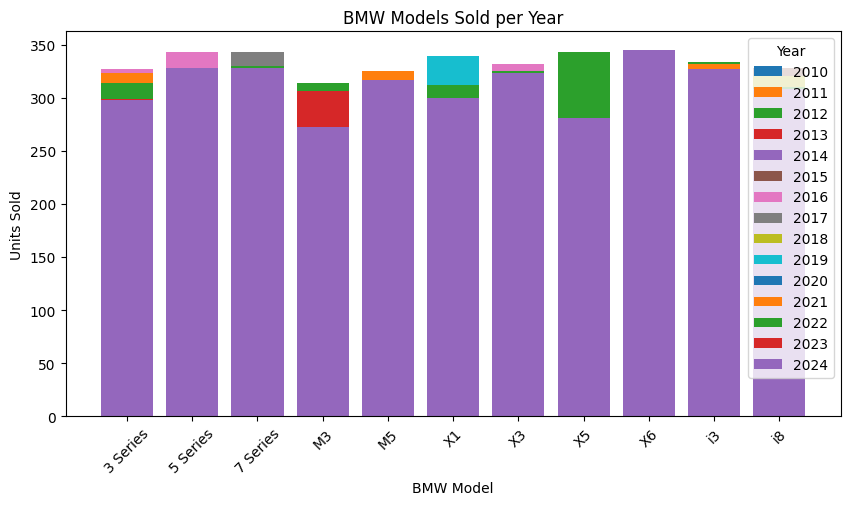

In [158]:
plt.figure(figsize=(10,5))
for year, group in sales_by_model.groupby('Year'):
    plt.bar(group['Model'], group['Total_Sold'], label=str(year))

plt.xlabel('BMW Model')
plt.ylabel('Units Sold')
plt.title('BMW Models Sold per Year')
plt.legend(title='Year')
plt.xticks(rotation=45)
plt.show()

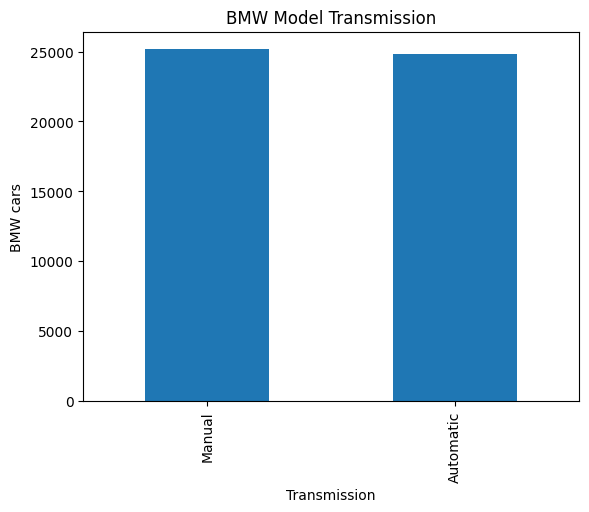

In [159]:
df['Transmission'].value_counts().plot(kind='bar')
plt.title("BMW Model Transmission")
plt.xlabel("Transmission")
plt.ylabel("BMW cars")
plt.show()

In [160]:
avg_mileage_per_model = df.groupby('Model')['Mileage_KM'].mean().reset_index()
avg_mileage_per_model

,Model,Mileage_KM
0,3 Series,100159.898368
1,5 Series,101356.634582
2,7 Series,100792.165881
3,M3,99729.770451
4,M5,102342.995757
5,X1,100375.682057
6,X3,100716.869024
7,X5,100259.739915
8,X6,99482.406208
9,i3,98734.766133


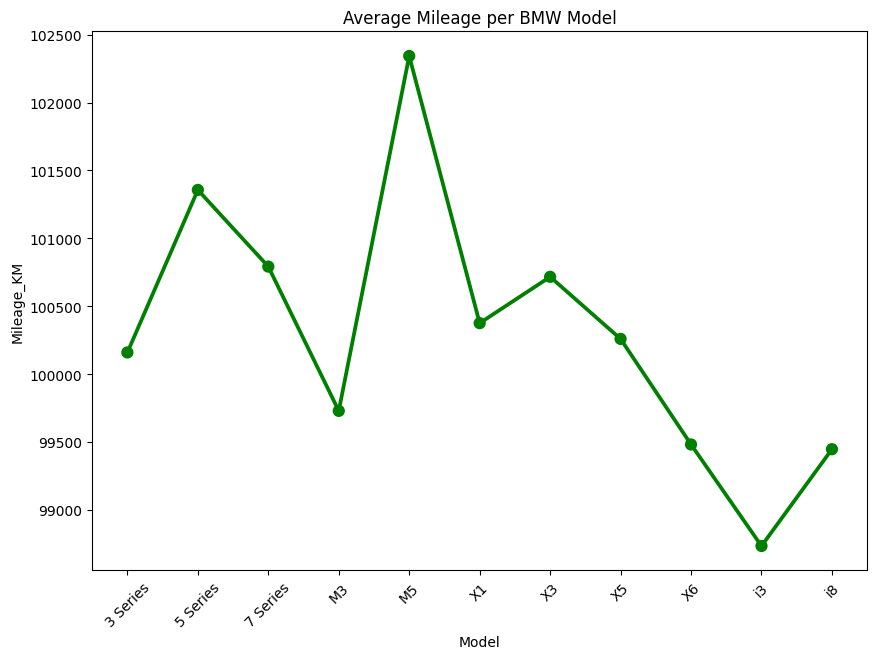

In [164]:
plt.figure(figsize=(10,7))
sns.pointplot(data=avg_mileage_per_model, x='Model', y='Mileage_KM', color='green')
plt.xticks(rotation=45)
plt.title('Average Mileage per BMW Model')
plt.show()